In [1]:
import json
import pandas as pd
import numpy as np
import os,sys
import re
import pickle

In [53]:
import csv
import pygal  

In [60]:
import matplotlib.pyplot as plt
from IPython.display import SVG, HTML, display
%matplotlib inline

In [3]:
#Supress default INFO logging

import logging
#logger = logging.getLogger()
#logger.setLevel(logging.CRITICAL)

In [4]:
#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/filtered_review.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    sample_object = json.loads(fp.readline())
    column_names = list(sample_object.keys())
    
print("Column names:\n{}".format(column_names))

Column names:
['stars', 'review_id', 'useful', 'business_id', 'text', 'user_id', 'cool', 'date', 'funny']


In [5]:
reviews = []

#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/filtered_review.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    for line in fp:
        review = json.loads(line)
        selected_review = []
        for item in column_names:
            selected_review.append(review[item])
        reviews.append(selected_review)

In [6]:
reviews[0]

[1,
 'ByRzJ8rF2KJWLr-cUNU6EA',
 0,
 'jQsNFOzDpxPmOurSWCg1vQ',
 'This place is horrible, we were so excited to try it since I got a gift card for my birthday. We went in an ordered are whole meal and they did not except are gift card, because their system was down. Unacceptable, this would have been so helpful if we would have known this prior!!',
 'kzyLOqiJvyw_FWFTw2rjiQ',
 0,
 '2017-06-03',
 0]

In [7]:
reviews_df = pd.DataFrame(reviews, columns=column_names)

In [8]:
reviews_df.head()

,stars,review_id,useful,business_id,text,user_id,cool,date,funny
0,1,ByRzJ8rF2KJWLr-cUNU6EA,0,jQsNFOzDpxPmOurSWCg1vQ,"This place is horrible, we were so excited to ...",kzyLOqiJvyw_FWFTw2rjiQ,0,2017-06-03,0
1,4,i5UwUPlQFPLcE8p2gPFwBw,1,jQsNFOzDpxPmOurSWCg1vQ,"For being fairly ""fast"" food.. Pei Wei (pronou...",WZXp9-V2dqRRJqhGgRqueA,0,2015-03-26,0
2,5,EyQyvTTg2jX4or9bB8PC9g,2,jQsNFOzDpxPmOurSWCg1vQ,"I decided to try it out, I'm celiac and theref...",XylT12exfdLiI_3uDLVIpw,1,2012-12-30,1
3,3,G-EFA005besj5uHsH0sQFA,1,jQsNFOzDpxPmOurSWCg1vQ,I'm not saying Pei Wei is the best asian food ...,Ji9PeffxjwqPLO7pEfSpKQ,1,2009-01-12,1
4,3,6PcJSGUBSLjt4VLXos5C4A,0,jQsNFOzDpxPmOurSWCg1vQ,Sometimes the food is spot on and delicious an...,TLIWzAJPrET0zX4_vgvLhg,0,2015-07-11,0


In [9]:
reviews_df.count()

stars          3216538
review_id      3216538
useful         3216538
business_id    3216538
text           3216538
user_id        3216538
cool           3216538
date           3216538
funny          3216538
dtype: int64

# Exploratory Analysis

## Update  0

In [10]:
review_count_dict = dict(reviews_df['stars'].value_counts())
star_counts = sorted(review_count_dict.items(), key=lambda x:x[0])
star_counts

[(1, 353524), (2, 307973), (3, 453642), (4, 895982), (5, 1205417)]

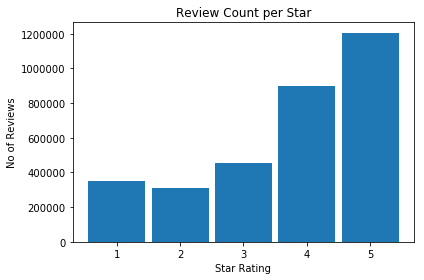

In [11]:
fig, ax = plt.subplots()

plt.bar(*zip(*star_counts),width=0.9)

ax.set_title("Review Count per Star")
ax.set_xlabel("Star Rating")
ax.set_ylabel("No of Reviews")
fig.tight_layout()

### Restaurants

In [12]:
#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/filtered_business.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    sample_object = json.loads(fp.readline())
    column_names = list(sample_object.keys())
    
print("Column names:\n{}".format(column_names))

Column names:
['hours', 'review_count', 'address', 'categories', 'latitude', 'is_open', 'stars', 'attributes', 'city', 'name', 'state', 'neighborhood', 'business_id', 'longitude', 'postal_code']


In [13]:
# Filtering Column names
column_names = ['business_id', 'name', 'review_count', 'stars', 'is_open', 'categories', 'attributes', 'city', 'state', 'latitude', 'longitude']

In [14]:
restaurants = []

#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/filtered_business.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    for line in fp:
        business = json.loads(line)
        selected_business = []
        for item in column_names:
            selected_business.append(business[item])
        restaurants.append(selected_business)

In [15]:
restaurants[0]

['mLwM-h2YhXl2NCgdS84_Bw',
 'South Florida Style Chicken & Ribs',
 4,
 4.5,
 0,
 ['Food', 'Soul Food', 'Convenience Stores', 'Restaurants'],
 {'Ambience': {'casual': False,
   'classy': False,
   'divey': False,
   'hipster': False,
   'intimate': False,
   'romantic': False,
   'touristy': False,
   'trendy': False,
   'upscale': False},
  'BusinessAcceptsCreditCards': False,
  'GoodForKids': True,
  'GoodForMeal': {'breakfast': False,
   'brunch': False,
   'dessert': False,
   'dinner': False,
   'latenight': False,
   'lunch': False},
  'HasTV': False,
  'NoiseLevel': 'average',
  'OutdoorSeating': False,
  'RestaurantsAttire': 'casual',
  'RestaurantsDelivery': True,
  'RestaurantsGoodForGroups': True,
  'RestaurantsPriceRange2': 2,
  'RestaurantsReservations': False,
  'RestaurantsTakeOut': True},
 'Charlotte',
 'NC',
 35.23687,
 -80.7419759]

In [16]:
restaurants_df = pd.DataFrame(restaurants, columns=column_names)

In [17]:
restaurants_df.head()

,business_id,name,review_count,stars,is_open,categories,attributes,city,state,latitude,longitude
0,mLwM-h2YhXl2NCgdS84_Bw,South Florida Style Chicken & Ribs,4,4.5,0,"[Food, Soul Food, Convenience Stores, Restaura...","{'Ambience': {'hipster': False, 'divey': False...",Charlotte,NC,35.236870,-80.741976
1,v2WhjAB3PIBA8J8VxG3wEg,The Tea Emporium,7,4.5,0,"[Food, Coffee & Tea]","{'RestaurantsPriceRange2': 2, 'WiFi': 'no', 'B...",Toronto,ON,43.677126,-79.353285
2,duHFBe87uNSXImQmvBh87Q,Blimpie,10,4.5,0,"[Sandwiches, Restaurants]","{'Ambience': {'hipster': False, 'divey': False...",Phoenix,AZ,33.505928,-112.038847
3,n33Izvzk_z9_51H6NsQF-A,Safeway,21,2.0,1,"[Flowers & Gifts, Bakeries, Grocery, Shopping,...","{'RestaurantsPriceRange2': 2, 'Caters': True, ...",Mesa,AZ,33.377428,-111.638108
4,SDMRxmcKPNt1AHPBKqO64Q,Applebee's,21,2.0,1,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...","{'Ambience': {'hipster': False, 'divey': False...",Matthews,NC,35.135196,-80.714683


In [18]:
restaurants_df.count()

business_id     65028
name            65028
review_count    65028
stars           65028
is_open         65028
categories      65028
attributes      65028
city            65028
state           65028
latitude        65028
longitude       65028
dtype: int64

In [19]:
restaurants_df['state'].value_counts()

ON     15703
AZ     13242
NV      8897
OH      5634
QC      5431
NC      4663
PA      4382
BW      1992
WI      1870
EDH     1831
IL       748
SC       274
MLN      112
HLD       73
FIF       30
ELN       29
C         26
WLN       19
NYK       17
NY        12
NI        10
ST         6
01         6
ESX        4
BY         3
WA         2
3          1
RCC        1
XGL        1
ZET        1
PKN        1
HH         1
CA         1
GLG        1
KHL        1
ABE        1
FLN        1
WHT        1
Name: state, dtype: int64

In [20]:
us_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
             "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
             "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
             "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
             "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [21]:
us_restaurants = restaurants_df[restaurants_df['state'].isin(us_states)]

In [22]:
print("Total Restaurants(US): {0}".format(len(us_restaurants.index)))
print("{0} open and {1} closed".format(us_restaurants['is_open'].value_counts()[1], us_restaurants['is_open'].value_counts()[0]))

Total Restaurants(US): 39725
29730 open and 9995 closed


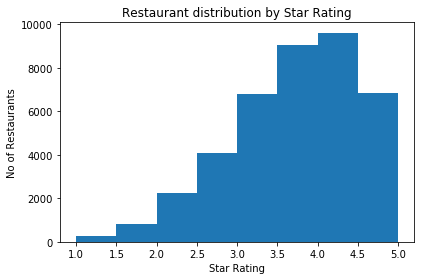

In [23]:
fig, ax = plt.subplots()
bins = [x/2. for x in range(2,11)]
ax.hist(us_restaurants['stars'], bins=bins)

ax.set_title("Restaurant distribution by Star Rating")
ax.set_xlabel("Star Rating")
ax.set_ylabel("No of Restaurants")
fig.tight_layout()

In [24]:
us_restaurants['state'].value_counts()

AZ    13242
NV     8897
OH     5634
NC     4663
PA     4382
WI     1870
IL      748
SC      274
NY       12
WA        2
CA        1
Name: state, dtype: int64

In [25]:
us_restaurants['stars'].value_counts()

4.0    9611
3.5    9072
3.0    6791
4.5    5233
2.5    4062
2.0    2229
5.0    1618
1.5     835
1.0     274
Name: stars, dtype: int64

In [26]:
one_star = us_restaurants.loc[restaurants_df['stars'].isin([1,1.5])]
one_star = one_star.reset_index(drop=True)
five_star = us_restaurants.loc[restaurants_df['stars'].isin([4.5,5])]
five_star = five_star.reset_index(drop=True)

In [27]:
delivery_list_1 = [r.get('RestaurantsDelivery') for r in one_star['attributes']]
delivery_list_5 = [r.get('RestaurantsDelivery') for r in five_star['attributes']]

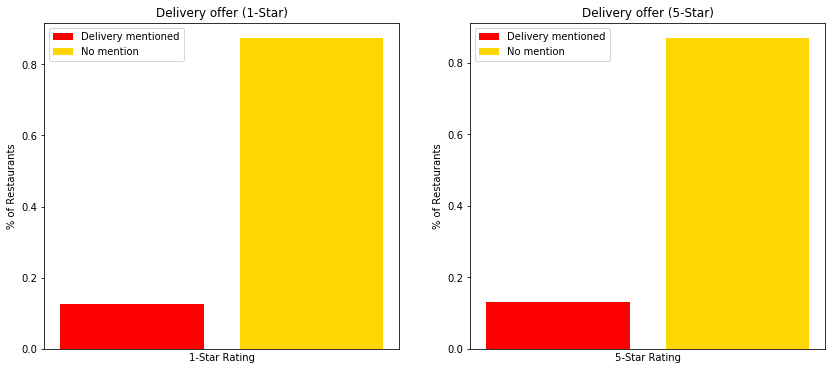

In [28]:
delivery_percent_1 = delivery_list_1.count(True)/len(delivery_list_1)
delivery_percent_5 = delivery_list_5.count(True)/len(delivery_list_5)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.bar(1,delivery_percent_1, color='red',label='Delivery mentioned')
ax1.bar(2,(1- delivery_percent_1), color='gold',label='No mention')

ax2.bar(1,delivery_percent_5, color='red',label='Delivery mentioned')
ax2.bar(2,(1- delivery_percent_5), color='gold',label='No mention')

ax1.set_title("Delivery offer (1-Star)")
ax1.set_xlabel("1-Star Rating")
ax1.set_ylabel("% of Restaurants")
ax1.set_xticks([], minor=False)
ax1.legend()

ax2.set_title("Delivery offer (5-Star)")
ax2.set_xlabel("5-Star Rating")
ax2.set_ylabel("% of Restaurants")
ax2.set_xticks([], minor=False)

ax2.legend()
fig.tight_layout()

In [29]:
delivery_percent_1, delivery_percent_5

(0.12623985572587917, 0.1315136476426799)

## User

In [30]:
#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/user.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    sample_object = json.loads(fp.readline())
    column_names = list(sample_object.keys())
    
print("Column names:\n{}".format(column_names))

Column names:
['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful', 'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


In [31]:
# Filtering Column names
column_names = ['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'elite', 'average_stars']

In [32]:
users = []

#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/user.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    for line in fp:
        user = json.loads(line)
        selected_user = []
        for item in column_names:
            selected_user.append(user[item])
        users.append(selected_user)

In [33]:
users_df = pd.DataFrame(users, columns=column_names)

In [34]:
users_df.head()

,user_id,name,review_count,yelping_since,friends,elite,average_stars
0,lsSiIjAKVl-QRxKjRErBeg,Cin,272,2010-07-13,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...","[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",3.80
1,om5ZiponkpRqUNa3pVPiRg,Andrea,2559,2006-01-18,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...","[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",3.94
2,-lGwMGHMC_XihFJNKCJNRg,Gabe,277,2014-10-31,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",[],4.72
3,D-ydMTPGWXTVm4_jjp0k9g,Leah,436,2013-04-01,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...","[2016, 2017]",3.76
4,PcvbBOCOcs6_suRDH7TSTg,Juan,921,2012-08-16,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...","[2017, 2016]",4.23


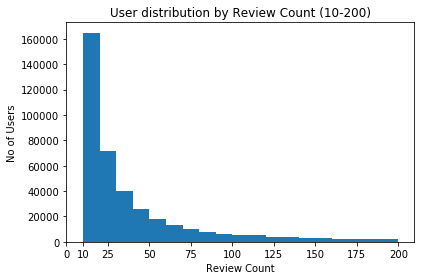

In [35]:
fig, ax = plt.subplots()

bins = np.arange(10,210,10)
ax.hist(users_df['review_count'], bins=bins)

ax.set_title("User distribution by Review Count (10-200)")
ax.set_xlabel("Review Count")
ax.set_ylabel("No of Users")

x_ticks = ax.get_xticks()
x_ticks[-1] = 10
ax.set_xticks(x_ticks)

fig.tight_layout()

In [36]:
print("No of Users with Zero Reviews posted: {0}\n".format(users_df[users_df['review_count']==0]['review_count'].count()))
print("Users with at least 1 but less than 10 reviews: {0}".format(users_df[(users_df['review_count']<10) & (users_df['review_count']>0)]['review_count'].count()))

No of Users with Zero Reviews posted: 1256

Users with at least 1 but less than 10 reviews: 765628


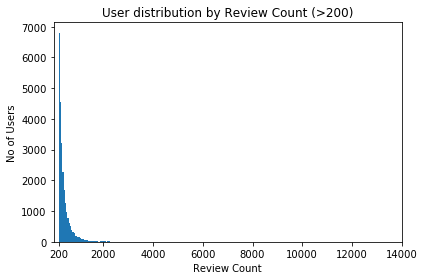

In [37]:
fig, ax = plt.subplots()

bins = list(np.arange(200,4000,50)) + list(np.arange(4000,9000,2000)) + [12000]
ax.hist(users_df['review_count'], bins=bins)

ax.set_title("User distribution by Review Count (>200)")
ax.set_xlabel("Review Count")
ax.set_ylabel("No of Users")

ax.set_xlim(left=0)
x_ticks = ax.get_xticks()
x_ticks[0] = 200
ax.set_xticks(x_ticks)

fig.tight_layout()

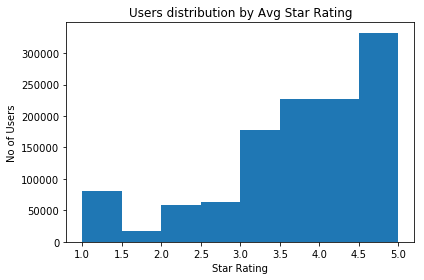

In [38]:
fig, ax = plt.subplots()
bins = [x/2. for x in range(2,11)]
ax.hist(users_df['average_stars'], bins=bins)

ax.set_title("Users distribution by Avg Star Rating")
ax.set_xlabel("Star Rating")
ax.set_ylabel("No of Users")
fig.tight_layout()

## Update 2

In [10]:
filename='topic_distribution.txt'
revcount = []

with open(filename, encoding="utf8", errors="ignore") as fp:
    for line in fp:
        revcount.append(int(line.split(':')[1]))

In [25]:
filename='topic clustering.csv'
topics = []

with open(filename) as inputfile:
        readCSV = csv.reader(inputfile, delimiter=',')
 
        for row in readCSV:
            topics.append(row[1])

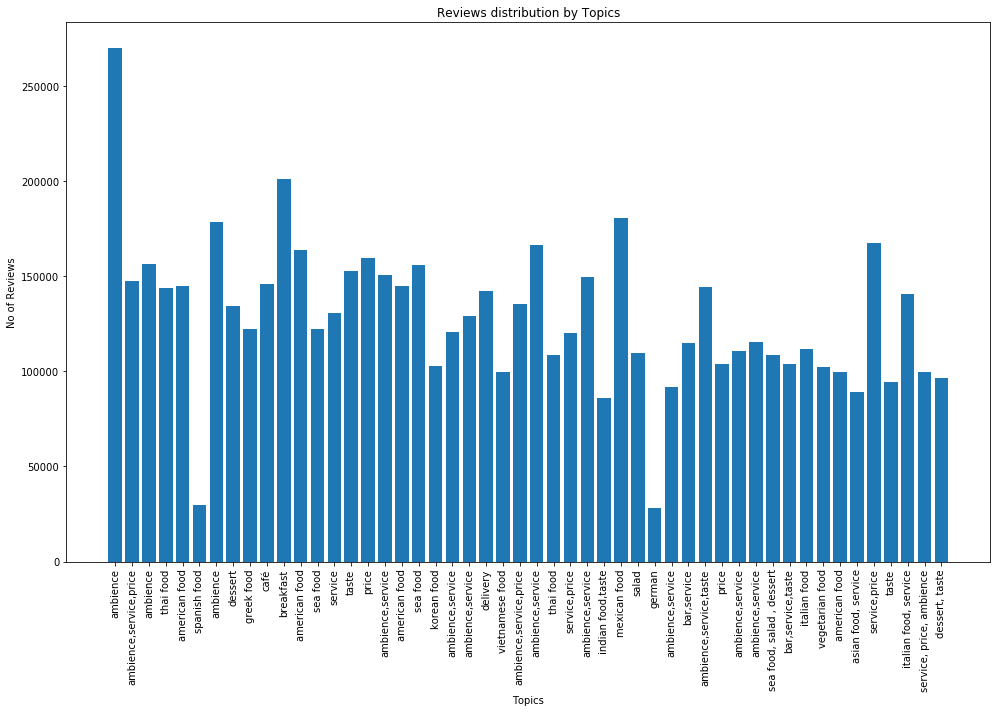

In [27]:
fig, ax = plt.subplots(figsize=(14,10))
x_ticks_loc = np.arange(1,len(revcount)+1,1)
#x_ticks = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
    
ax.bar(np.arange(1,len(revcount)+1), revcount)
ax.set_xticks(x_ticks_loc, minor=False )
ax.set_xticklabels(topics, minor=False, rotation=90, horizontalalignment='center')

ax.set_title("Reviews distribution by Topics")
ax.set_xlabel("Topics")
ax.set_ylabel("No of Reviews")
fig.tight_layout()

After stopword removal, we found that #Topics = 50 gave very reasonable results for our restaurant review dataset.

For small topic numbers vocabulary belonging to seperate topics would become grouped into single topics, and for large topic numbers vocabulary that we might associate with a single topic (such as service) would become seperated into several individual
topics.


In [28]:
# Combining Topics (based on List indices)
ambience = [0,1,2,6,16,20,21,24,25,28,33,37,38,48]
service = [1,16,20,21,24,25,27,28,33,34,35,37,28,40,45,47,48]
price = [1,15,24,36,45,48]
delivery = [22]
taste = [14,29,35,40,46,49]
food = [3,4,5,7,8,9,10,11,12,17,18,19,23,26,29,30,31,32,34,39,40,41,42,43,44,47,49]

In [75]:
topic_revcount = {}

for t in ['ambience', 'service', 'price', 'delivery', 'taste','food']:
    topic_revcount[t] = sum([revcount[i] for i in vars()[t]])
    
topic_revcount = sorted(topic_revcount.items(), key=lambda x: x[1], reverse=True)
total_reviews = sum([rc[1] for rc in topic_revcount])

topic_revcount

[('food', 3193568),
 ('service', 2244119),
 ('ambience', 2023761),
 ('price', 814219),
 ('taste', 678272),
 ('delivery', 142225)]

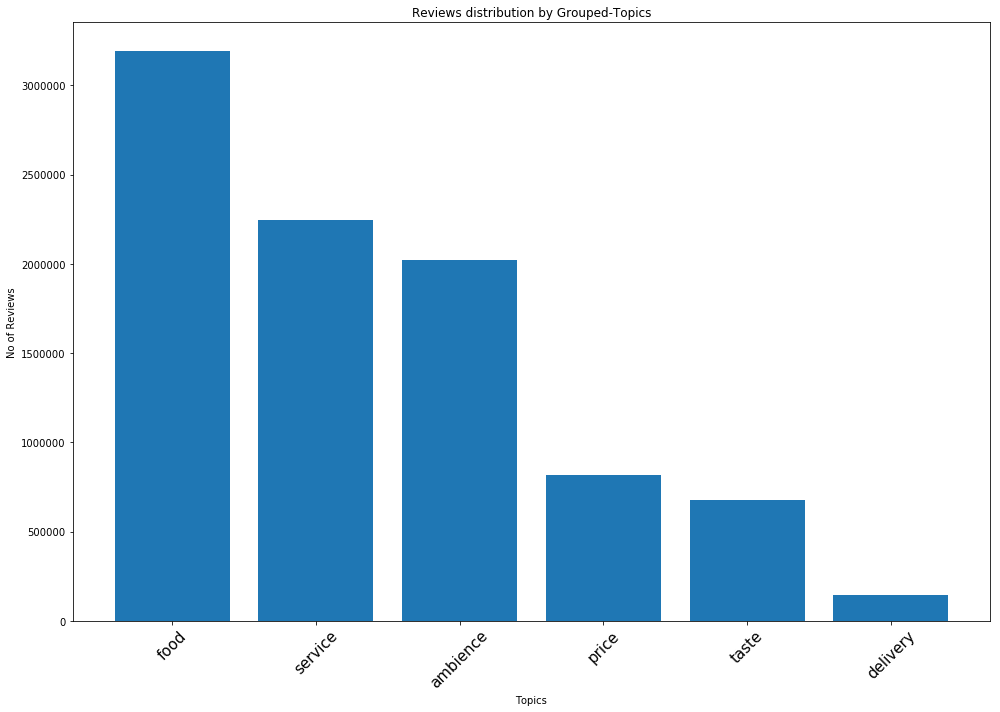

In [76]:
fig, ax = plt.subplots(figsize=(14,10))

y_values = [rc[1] for rc in topic_revcount]
x_ticks_loc = np.arange(1,len(y_values)+1,1)
x_ticks_labels = [t[0] for t in topic_revcount]
    
ax.bar(np.arange(1,len(y_values)+1), y_values)
ax.set_xticks(x_ticks_loc, minor=False )
ax.set_xticklabels(x_ticks_labels, minor=False, rotation=45, horizontalalignment='center', fontsize=15)

ax.set_title("Reviews distribution by Grouped-Topics")
ax.set_xlabel("Topics")
ax.set_ylabel("No of Reviews")
fig.tight_layout()

In [69]:
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [81]:
pie_chart = pygal.Pie(inner_radius=.4)
pie_chart.title = 'Reviews distribution among Topics (in %)'
pie_chart.add('Food', round(topic_revcount[0][1]/total_reviews*100, 2))
pie_chart.add('Service', round(topic_revcount[1][1]/total_reviews*100, 2))
pie_chart.add('Ambience', round(topic_revcount[2][1]/total_reviews*100, 2))
pie_chart.add('Price', round(topic_revcount[3][1]/total_reviews*100, 2))
pie_chart.add('Taste', round(topic_revcount[4][1]/total_reviews*100, 2))
pie_chart.add('Delivery', round(topic_revcount[5][1]/total_reviews*100, 2))

display(HTML(html_pygal.format(pygal_render=pie_chart.render(is_unicode=True))))